<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Data Normalization Techniques**


Estimated time needed: **30** minutes


In this lab, you will focus on data normalization. This includes identifying compensation-related columns, applying normalization techniques, and visualizing the data distributions.


## Objectives


In this lab, you will perform the following:


- Identify duplicate rows and remove them.

- Check and handle missing values in key columns.

- Identify and normalize compensation-related columns.

- Visualize the effect of normalization techniques on data distributions.


-----


## Hands on Lab


#### Step 1: Install and Import Libraries


In [1]:
!pip install pandas

In [2]:
!pip install matplotlib

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

### Step 2: Load the Dataset into a DataFrame


We use the <code>pandas.read_csv()</code> function for reading CSV files. However, in this version of the lab, which operates on JupyterLite, the dataset needs to be downloaded to the interface using the provided code below.


The functions below will download the dataset into your browser:


In [4]:
file_path = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv"

df = pd.read_csv(file_path)

# Display the first few rows to check if data is loaded correctly
print(df.head())


   ResponseId                      MainBranch                 Age  \
0           1  I am a developer by profession  Under 18 years old   
1           2  I am a developer by profession     35-44 years old   
2           3  I am a developer by profession     45-54 years old   
3           4           I am learning to code     18-24 years old   
4           5  I am a developer by profession     18-24 years old   

            Employment RemoteWork   Check  \
0  Employed, full-time     Remote  Apples   
1  Employed, full-time     Remote  Apples   
2  Employed, full-time     Remote  Apples   
3   Student, full-time        NaN  Apples   
4   Student, full-time        NaN  Apples   

                                    CodingActivities  \
0                                              Hobby   
1  Hobby;Contribute to open-source projects;Other...   
2  Hobby;Contribute to open-source projects;Other...   
3                                                NaN   
4                                 

In [5]:
#df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv")

### Section 1: Handling Duplicates
##### Task 1: Identify and remove duplicate rows.


In [6]:
## Write your code here


# Identify duplicate rows
duplicate_rows = df[df.duplicated()]

# Print the duplicate rows (optional)
# print("Duplicate Rows:")
# print(duplicate_rows)

# Remove duplicate rows
df.drop_duplicates(inplace=True)

# Verify the removal of duplicates
print(f"Number of rows after removing duplicates: {len(df)}")
print(f"Number of duplicate rows remaining: {df.duplicated().sum()}")

Number of rows after removing duplicates: 65437
Number of duplicate rows remaining: 0


In [7]:
# Print the datatype of all columns.

with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(df.dtypes)

ResponseId                          int64
MainBranch                         object
Age                                object
Employment                         object
RemoteWork                         object
Check                              object
CodingActivities                   object
EdLevel                            object
LearnCode                          object
LearnCodeOnline                    object
TechDoc                            object
YearsCode                          object
YearsCodePro                       object
DevType                            object
OrgSize                            object
PurchaseInfluence                  object
BuyNewTool                         object
BuildvsBuy                         object
TechEndorse                        object
Country                            object
Currency                           object
CompTotal                         float64
LanguageHaveWorkedWith             object
LanguageWantToWorkWith            

### Section 2: Handling Missing Values
##### Task 2: Identify missing values in `CodingActivities`.


In [8]:
## Write your code here

# field : CodingActivities                   

# Remove duplicate rows
df.drop_duplicates(inplace=True)

# Identify missing values in CodingActivities
missing_coding_activities = df['CodingActivities'].isnull().sum()

# Display the result using .format()
print("Number of missing values in 'CodingActivities' column: {}".format(missing_coding_activities))

Number of missing values in 'CodingActivities' column: 10971


##### Task 3: Impute missing values in CodingActivities with forward-fill.


In [9]:
## Write your code here

# Remove duplicate rows
df.drop_duplicates(inplace=True)

# Impute missing values in CodingActivities with forward-fill
df['CodingActivities'].fillna(method='ffill', inplace=True)

# Verify the imputation
print(f"Number of missing values in 'CodingActivities' after imputation: {df['CodingActivities'].isnull().sum()}")

# Optionally, display the first few rows to see the changes
print(df.head())

Number of missing values in 'CodingActivities' after imputation: 0
   ResponseId                      MainBranch                 Age  \
0           1  I am a developer by profession  Under 18 years old   
1           2  I am a developer by profession     35-44 years old   
2           3  I am a developer by profession     45-54 years old   
3           4           I am learning to code     18-24 years old   
4           5  I am a developer by profession     18-24 years old   

            Employment RemoteWork   Check  \
0  Employed, full-time     Remote  Apples   
1  Employed, full-time     Remote  Apples   
2  Employed, full-time     Remote  Apples   
3   Student, full-time        NaN  Apples   
4   Student, full-time        NaN  Apples   

                                    CodingActivities  \
0                                              Hobby   
1  Hobby;Contribute to open-source projects;Other...   
2  Hobby;Contribute to open-source projects;Other...   
3  Hobby;Contribute to 

/tmp/ipykernel_763/3909544092.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['CodingActivities'].fillna(method='ffill', inplace=True)
/tmp/ipykernel_763/3909544092.py:7: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['CodingActivities'].fillna(method='ffill', inplace=True)


In [10]:
df['CodingActivities']

0                                                    Hobby
1        Hobby;Contribute to open-source projects;Other...
2        Hobby;Contribute to open-source projects;Other...
3        Hobby;Contribute to open-source projects;Other...
4        Hobby;Contribute to open-source projects;Other...
                               ...                        
65432                        Hobby;School or academic work
65433             Hobby;Contribute to open-source projects
65434                                                Hobby
65435    Hobby;Contribute to open-source projects;Profe...
65436    Hobby;Contribute to open-source projects;Profe...
Name: CodingActivities, Length: 65437, dtype: object

**Note**:  Before normalizing ConvertedCompYearly, ensure that any missing values (NaN) in this column are handled appropriately. You can choose to either drop the rows containing NaN or replace the missing values with a suitable statistic (e.g., median or mean).


### Section 3: Normalizing Compensation Data
##### Task 4: Identify compensation-related columns, such as ConvertedCompYearly.
Normalization is commonly applied to compensation data to bring values within a comparable range. Here, you’ll identify ConvertedCompYearly or similar columns, which contain compensation information. This column will be used in the subsequent tasks for normalization.


In [11]:
## Write your code here

# Remove duplicate rows
df.drop_duplicates(inplace=True)

# Identify compensation-related columns
compensation_columns = [col for col in df.columns if 'Comp' in col]

# Print the compensation-related columns
print("Compensation-related columns:")
print(compensation_columns)

# Optionally, print the first few rows of the compensation columns
if compensation_columns:
    print("\nFirst few rows of compensation columns:")
    print(df[compensation_columns].head())


Compensation-related columns:
['CompTotal', 'AIComplex', 'ConvertedCompYearly']

First few rows of compensation columns:
   CompTotal                      AIComplex  ConvertedCompYearly
0        NaN                            NaN                  NaN
1        NaN                            NaN                  NaN
2        NaN                            NaN                  NaN
3        NaN  Bad at handling complex tasks                  NaN
4        NaN                            NaN                  NaN


##### Task 5: Normalize ConvertedCompYearly using Min-Max Scaling.
Min-Max Scaling brings all values in a column to a 0-1 range, making it useful for comparing data across different scales. Here, you will apply Min-Max normalization to the ConvertedCompYearly column, creating a new column ConvertedCompYearly_MinMax with normalized values.


In [12]:
!pip install scikit-learn

In [13]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler


In [14]:
## Write your code here


# Remove duplicate rows
df.drop_duplicates(inplace=True)

# Handle missing values in 'ConvertedCompYearly' (replace with median)
median_comp = df['ConvertedCompYearly'].median()
df['ConvertedCompYearly'].fillna(median_comp, inplace=True)

# Normalize ConvertedCompYearly using Min-Max Scaling
scaler = MinMaxScaler()
df['NormalizedCompYearly'] = scaler.fit_transform(df[['ConvertedCompYearly']])

# Display the normalized column
print(df[['ConvertedCompYearly', 'NormalizedCompYearly']].head())

# Optionally, check the min and max of the normalized column
print(f"\nMin of NormalizedCompYearly: {df['NormalizedCompYearly'].min()}")
print(f"Max of NormalizedCompYearly: {df['NormalizedCompYearly'].max()}")

   ConvertedCompYearly  NormalizedCompYearly
0              65000.0              0.003998
1              65000.0              0.003998
2              65000.0              0.003998
3              65000.0              0.003998
4              65000.0              0.003998

Min of NormalizedCompYearly: 0.0
Max of NormalizedCompYearly: 1.0


/tmp/ipykernel_763/245924000.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['ConvertedCompYearly'].fillna(median_comp, inplace=True)


##### Task 6: Apply Z-score Normalization to `ConvertedCompYearly`.

Z-score normalization standardizes values by converting them to a distribution with a mean of 0 and a standard deviation of 1. This method is helpful for datasets with a Gaussian (normal) distribution. Here, you’ll calculate Z-scores for the ConvertedCompYearly column, saving the results in a new column ConvertedCompYearly_Zscore.


In [15]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

In [16]:
## Write your code here

# Remove duplicate rows
df.drop_duplicates(inplace=True)

# Handle missing values in 'ConvertedCompYearly' (replace with median)
median_comp = df['ConvertedCompYearly'].median()
df['ConvertedCompYearly'].fillna(median_comp, inplace=True)

# Apply Z-score Normalization to ConvertedCompYearly
scaler = StandardScaler()
df['ZScoreCompYearly'] = scaler.fit_transform(df[['ConvertedCompYearly']])

# Display the normalized column
print(df[['ConvertedCompYearly', 'ZScoreCompYearly']].head())

# Optionally, check the mean and standard deviation of the normalized column
print(f"\nMean of ZScoreCompYearly: {df['ZScoreCompYearly'].mean()}")
print(f"Standard deviation of ZScoreCompYearly: {df['ZScoreCompYearly'].std()}")

   ConvertedCompYearly  ZScoreCompYearly
0              65000.0         -0.067514
1              65000.0         -0.067514
2              65000.0         -0.067514
3              65000.0         -0.067514
4              65000.0         -0.067514

Mean of ZScoreCompYearly: -5.3857786410900513e-17
Standard deviation of ZScoreCompYearly: 1.0000076410246617


/tmp/ipykernel_763/2131927974.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['ConvertedCompYearly'].fillna(median_comp, inplace=True)


### Section 4: Visualization of Normalized Data
##### Task 7: Visualize the distribution of `ConvertedCompYearly`, `ConvertedCompYearly_Normalized`, and `ConvertedCompYearly_Zscore`

Visualization helps you understand how normalization changes the data distribution. In this task, create histograms for the original ConvertedCompYearly, as well as its normalized versions (ConvertedCompYearly_MinMax and ConvertedCompYearly_Zscore). This will help you compare how each normalization technique affects the data range and distribution.


In [17]:
!pip install seaborn

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler

/tmp/ipykernel_763/480935051.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['ConvertedCompYearly'].fillna(median_comp, inplace=True)


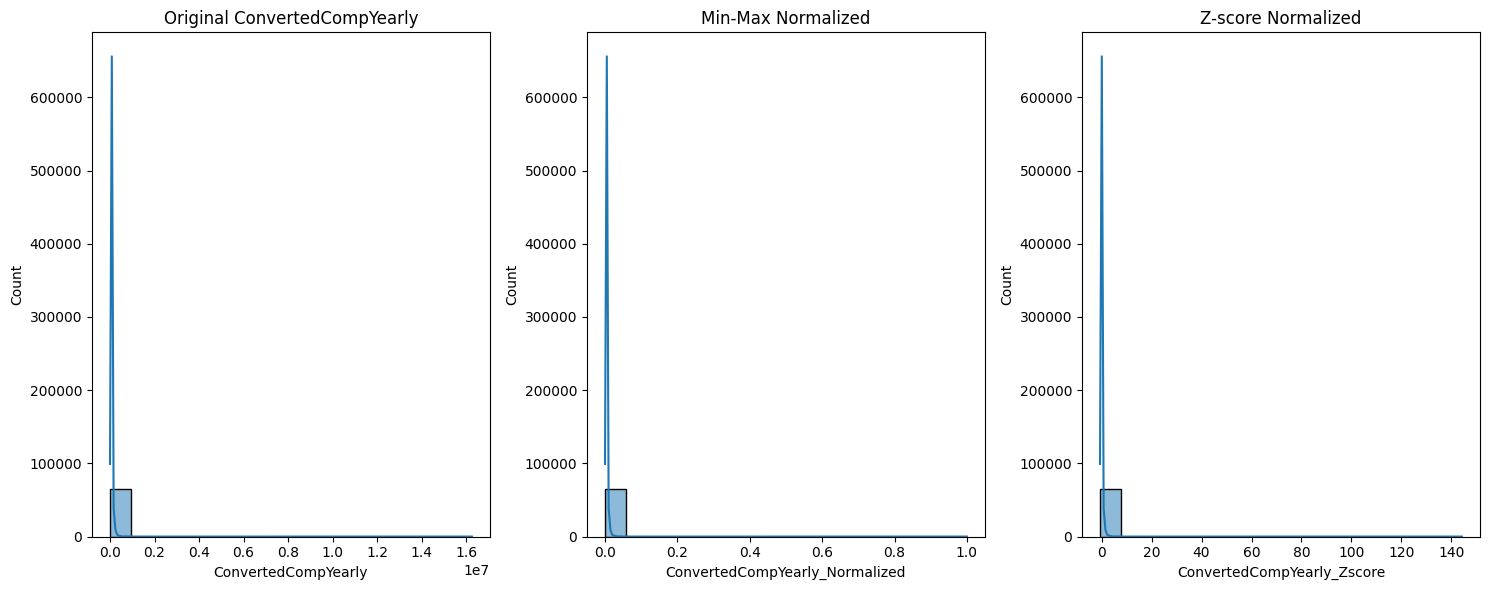

In [19]:
## Write your code here

# Remove duplicate rows
df.drop_duplicates(inplace=True)

# Handle missing values in 'ConvertedCompYearly'
median_comp = df['ConvertedCompYearly'].median()
df['ConvertedCompYearly'].fillna(median_comp, inplace=True)

# Normalize ConvertedCompYearly using Min-Max Scaling
scaler_minmax = MinMaxScaler()
df['ConvertedCompYearly_Normalized'] = scaler_minmax.fit_transform(df[['ConvertedCompYearly']])

# Apply Z-score Normalization to ConvertedCompYearly
scaler_zscore = StandardScaler()
df['ConvertedCompYearly_Zscore'] = scaler_zscore.fit_transform(df[['ConvertedCompYearly']])

# Visualize the distributions
plt.figure(figsize=(15, 6))

# Original ConvertedCompYearly
plt.subplot(1, 3, 1)
sns.histplot(df['ConvertedCompYearly'], kde=True)
plt.title('Original ConvertedCompYearly')

# Min-Max Normalized
plt.subplot(1, 3, 2)
sns.histplot(df['ConvertedCompYearly_Normalized'], kde=True)
plt.title('Min-Max Normalized')

# Z-score Normalized
plt.subplot(1, 3, 3)
sns.histplot(df['ConvertedCompYearly_Zscore'], kde=True)
plt.title('Z-score Normalized')

plt.tight_layout()
plt.show()

### Summary


In this lab, you practiced essential normalization techniques, including:

- Identifying and handling duplicate rows.

- Checking for and imputing missing values.

- Applying Min-Max scaling and Z-score normalization to compensation data.

- Visualizing the impact of normalization on data distribution.


Copyright © IBM Corporation. All rights reserved.
